In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train=pd.read_csv(r"C:\Users\Amby\Downloads\train_ctrUa4K.csv")
test=pd.read_csv(r"C:\Users\Amby\Downloads\test_lAUu6dG.csv")


In [3]:
train_original=train.copy()
test_original=train.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
train.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [13]:
test.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP001015,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


### Analysing Target Variable

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

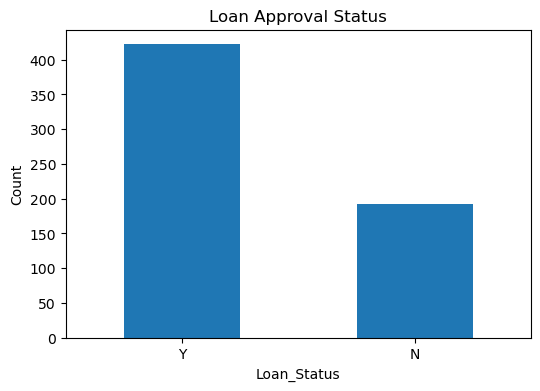

In [15]:
plt.figure(figsize=(6,4))
train['Loan_Status'].value_counts().plot(kind='bar')
plt.title("Loan Approval Status")
plt.xlabel('Loan_Status')
plt.xticks(rotation=360)
plt.ylabel("Count")
plt.show()

### Plotting numerical variables of train data

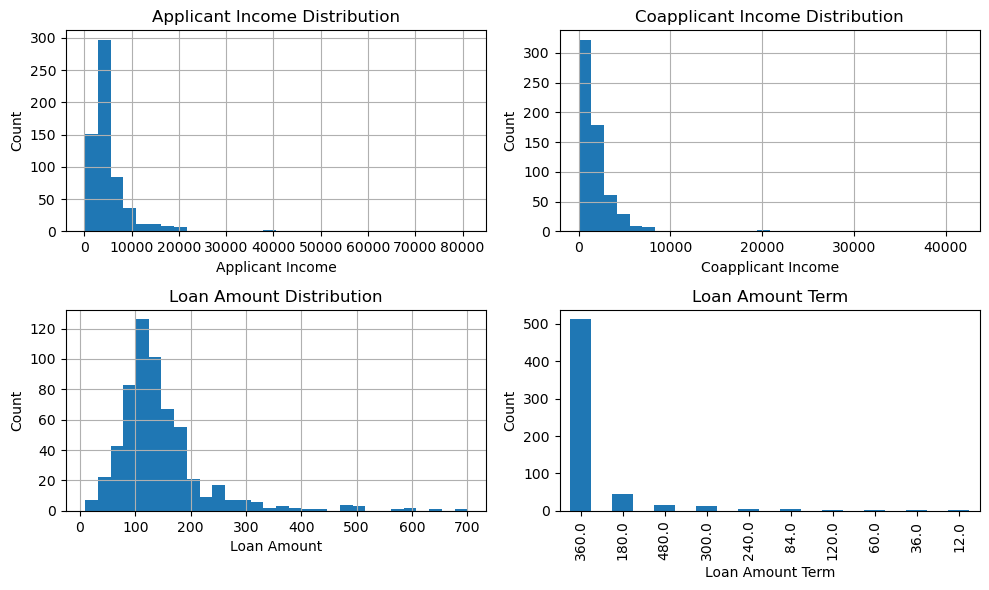

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
train['ApplicantIncome'].hist(bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(2,2,2)
train['CoapplicantIncome'].hist(bins=30)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')


plt.subplot(2,2,3)
train['LoanAmount'].hist(bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.subplot(2,2,4)
train['Loan_Amount_Term'].value_counts().plot(kind='bar')
plt.title('Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




### Plotting Categorical Variables of train data

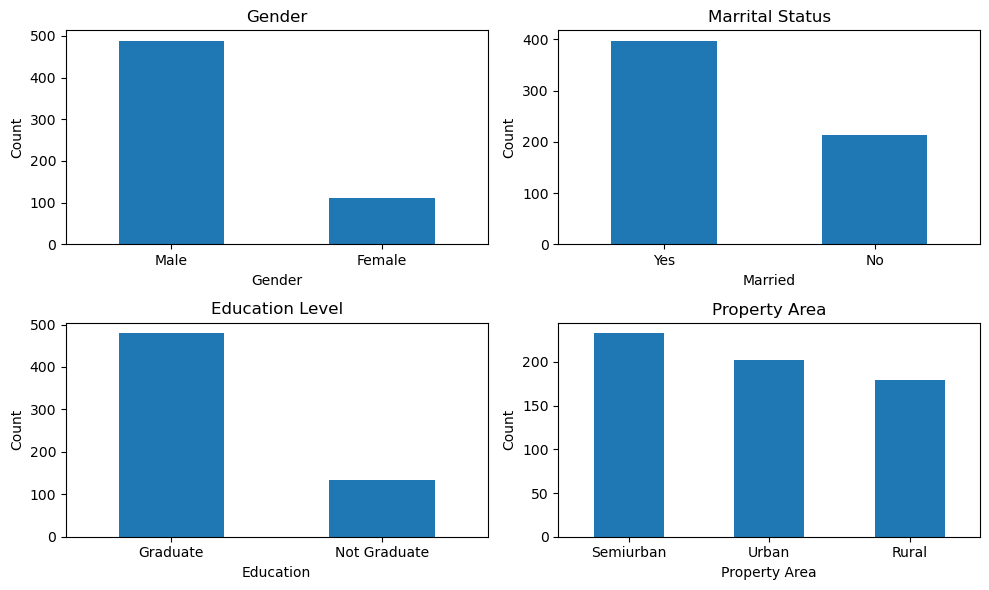

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
train['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.xlabel('Gender')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,2)
train['Married'].value_counts().plot(kind='bar')
plt.title("Marrital Status")
plt.xlabel('Married')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,3)
train['Education'].value_counts().plot(kind='bar')
plt.title("Education Level")
plt.xlabel('Education')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,4)
train['Property_Area'].value_counts().plot(kind='bar')
plt.title("Property Area")
plt.xlabel('Property Area')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Plotting numerical variables of test data

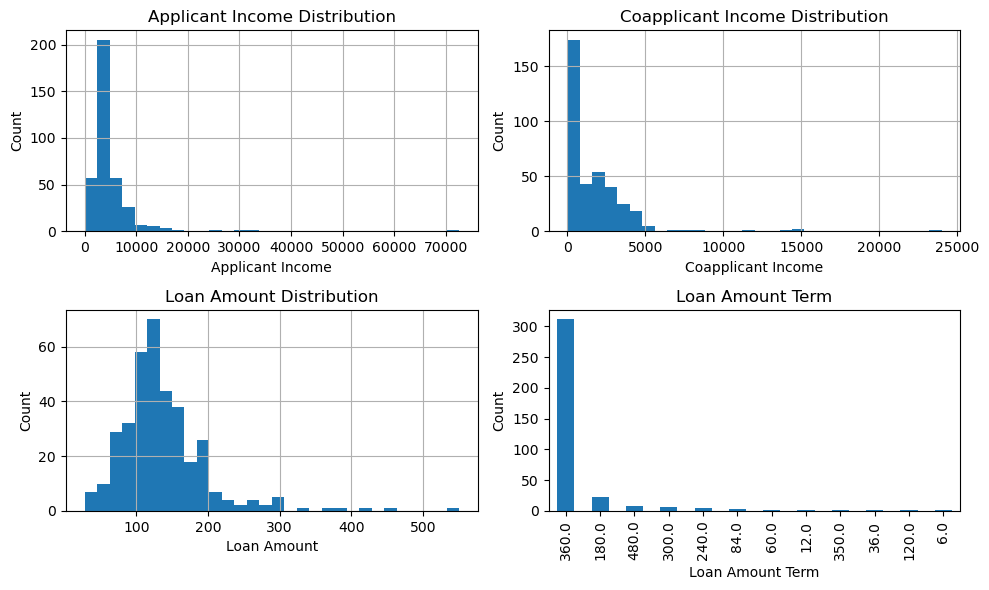

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
test['ApplicantIncome'].hist(bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(2,2,2)
test['CoapplicantIncome'].hist(bins=30)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')


plt.subplot(2,2,3)
test['LoanAmount'].hist(bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.subplot(2,2,4)
test['Loan_Amount_Term'].value_counts().plot(kind='bar')
plt.title('Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



### Plotting Categorical Variables of test data

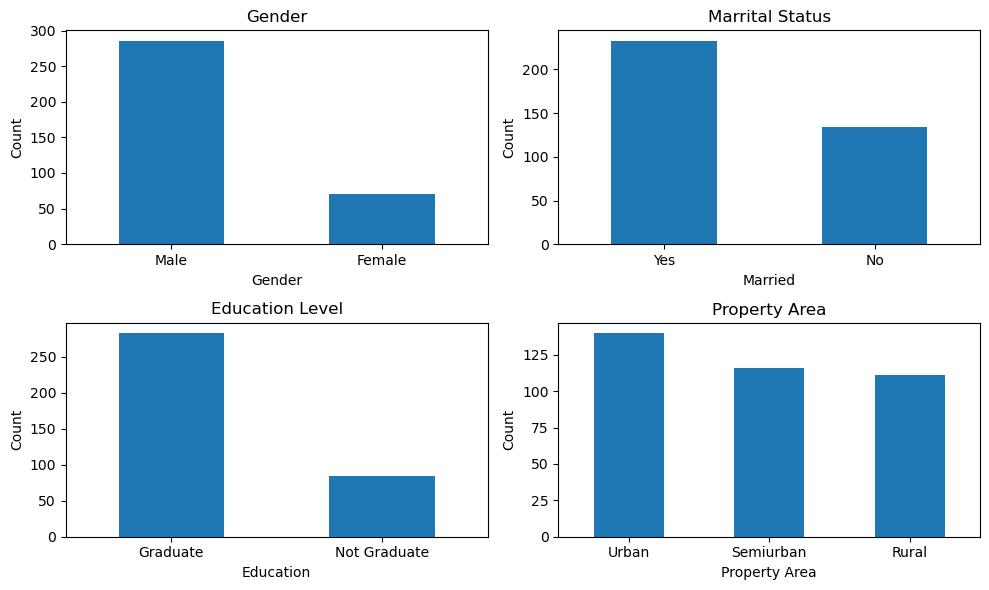

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
test['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.xlabel('Gender')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,2)
test['Married'].value_counts().plot(kind='bar')
plt.title("Marrital Status")
plt.xlabel('Married')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,3)
test['Education'].value_counts().plot(kind='bar')
plt.title("Education Level")
plt.xlabel('Education')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.subplot(2,2,4)
test['Property_Area'].value_counts().plot(kind='bar')
plt.title("Property Area")
plt.xlabel('Property Area')
plt.xticks(rotation=360)
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Checking for missing values of train data

In [20]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].median())



In [22]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking for missing values of test data

In [23]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [24]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].median())



In [25]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Handling of train data

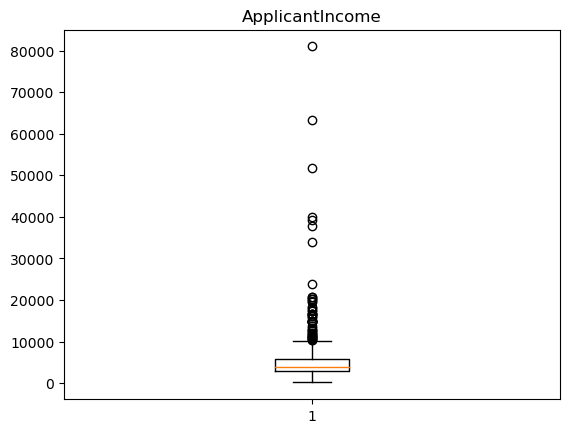

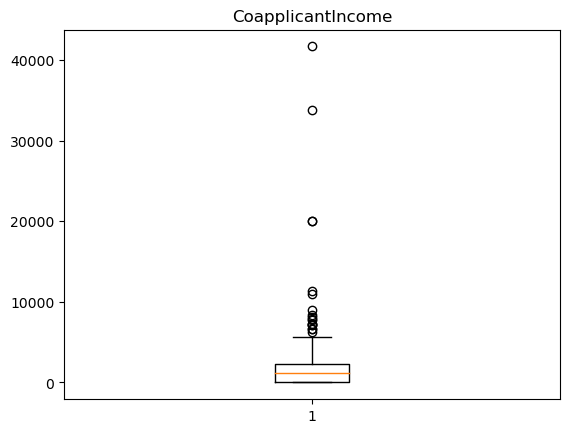

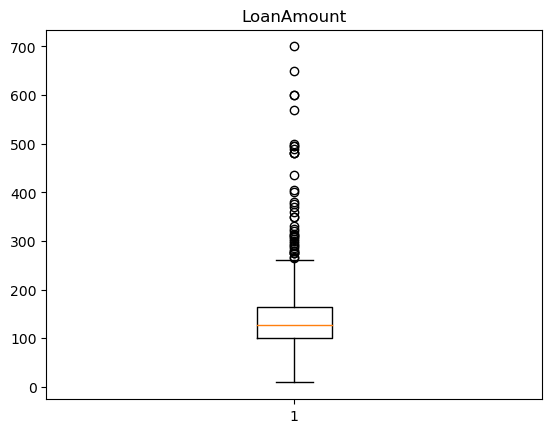

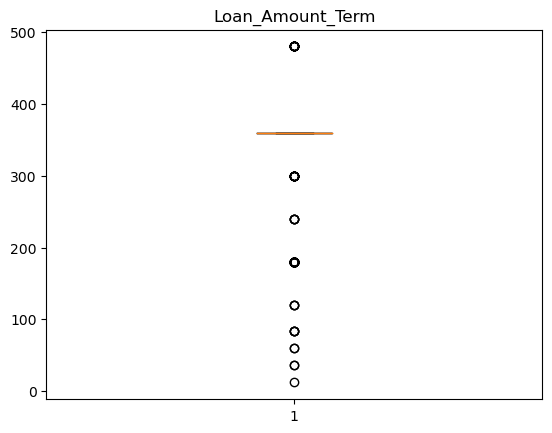

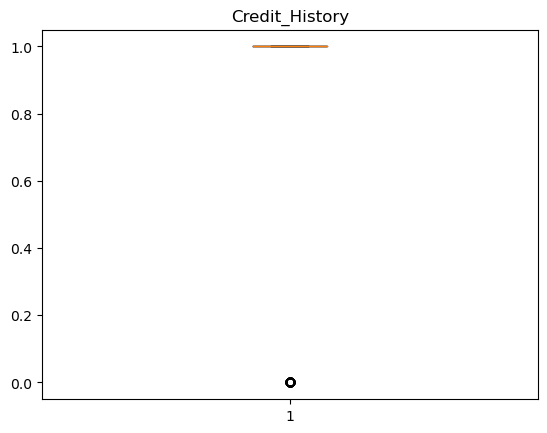

In [26]:
num_data=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'] 
for i in num_data:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)
    plt.show()

#### *From the above boxplots, we can see that there is outliers in all the numerical features. Since, it may harm the dataset if we remove the outlier, we can perform flooring and capping technique to handle the outliers.

#### Outlier handling of feature 'ApplicantIncome' of train data

In [108]:
 
Q1_Ai=np.percentile(train['ApplicantIncome'],25,interpolation='midpoint')
Q2_Ai=np.percentile(train['ApplicantIncome'],50,interpolation='midpoint')
Q3_Ai=np.percentile(train['ApplicantIncome'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_Ai=Q3_Ai-Q1_Ai
up_lim_Ai=Q3_Ai+1.5*IQR_Ai
low_lim_Ai=Q1_Ai-1.5*IQR_Ai
train['ApplicantIncome']=np.where(train['ApplicantIncome']>up_lim_Ai,up_lim_Ai,np.where(train['ApplicantIncome']<low_lim_Ai,low_lim_Ai,train['ApplicantIncome']))

#### Outlier Handling for 'CoapplicantIncome' of train data

In [28]:
Q1_cai=np.percentile(train['CoapplicantIncome'],25,interpolation='midpoint')
Q2_cai=np.percentile(train['CoapplicantIncome'],50,interpolation='midpoint')
Q3_cai=np.percentile(train['CoapplicantIncome'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_cai=Q3_cai-Q1_cai
up_lim_cai=Q3_cai+1.5*IQR_cai
low_lim_cai=Q1_cai-1.5*IQR_cai
train['CoapplicantIncome']=np.where(train['CoapplicantIncome']>up_lim_cai,up_lim_cai,np.where(train['CoapplicantIncome']<low_lim_cai,low_lim_cai,train['CoapplicantIncome']))

#### Outlier Handling for 'LoanAmount' of train data

In [29]:
Q1_la=np.percentile(train['LoanAmount'],25,interpolation='midpoint')
Q2_la=np.percentile(train['LoanAmount'],50,interpolation='midpoint')
Q3_la=np.percentile(train['LoanAmount'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_la=Q3_la-Q1_la
up_lim_la=Q3_la+1.5*IQR_la
low_lim_la=Q1_la-1.5*IQR_la
train['LoanAmount']=np.where(train['LoanAmount']>up_lim_la,up_lim_la,np.where(train['LoanAmount']<low_lim_la,low_lim_la,train['LoanAmount']))

#### Outlier handling for 'Loan_Amount_Term' of train data

In [30]:
Q1_lat=np.percentile(train['Loan_Amount_Term'],25,interpolation='midpoint')
Q2_lat=np.percentile(train['Loan_Amount_Term'],50,interpolation='midpoint')
Q3_lat=np.percentile(train['Loan_Amount_Term'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_lat=Q3_lat-Q1_lat
up_lim_lat=Q3_lat+1.5*IQR_lat
low_lim_lat=Q1_lat-1.5*IQR_lat
train['Loan_Amount_Term']=np.where(train['Loan_Amount_Term']>up_lim_lat,up_lim_lat,np.where(train['Loan_Amount_Term']<low_lim_lat,low_lim_lat,train['Loan_Amount_Term']))

#### Outlier handling for 'Credit_History' of train data

In [31]:
Q1_ch=np.percentile(train['Credit_History'],25,interpolation='midpoint')
Q2_ch=np.percentile(train['Credit_History'],50,interpolation='midpoint')
Q3_ch=np.percentile(train['Credit_History'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_ch=Q3_ch-Q1_ch
up_lim_ch=Q3_ch+1.5*IQR_ch
low_lim_ch=Q1_ch-1.5*IQR_ch
train['Credit_History']=np.where(train['Credit_History']>up_lim_ch,up_lim_ch,np.where(train['Credit_History']<low_lim_ch,low_lim_ch,train['Credit_History']))

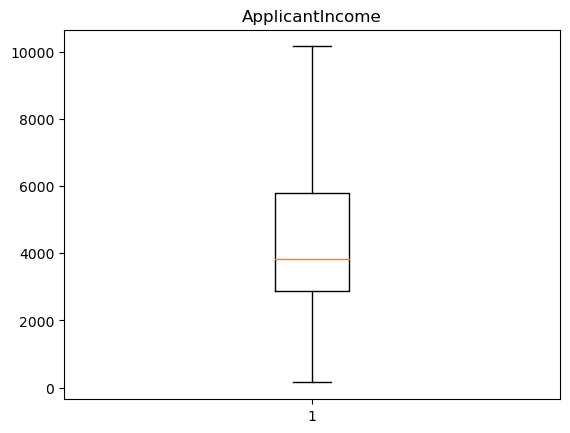

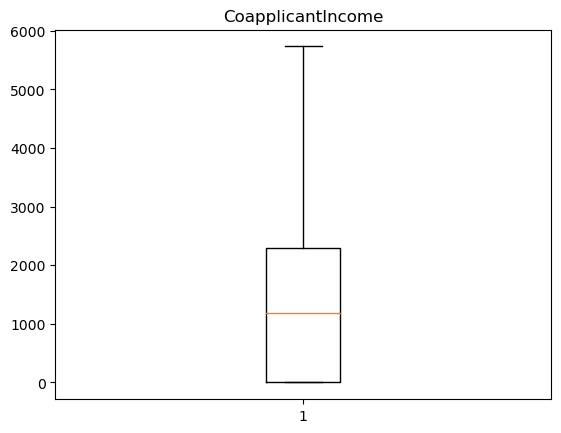

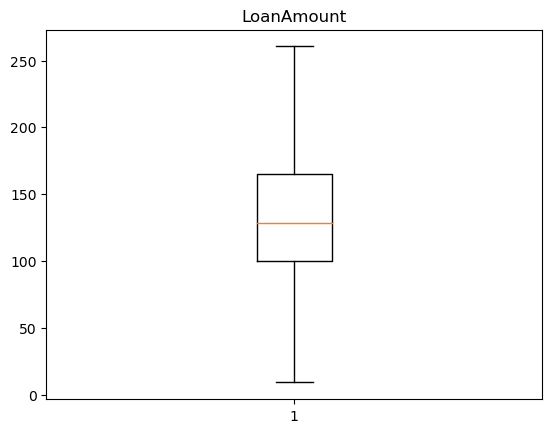

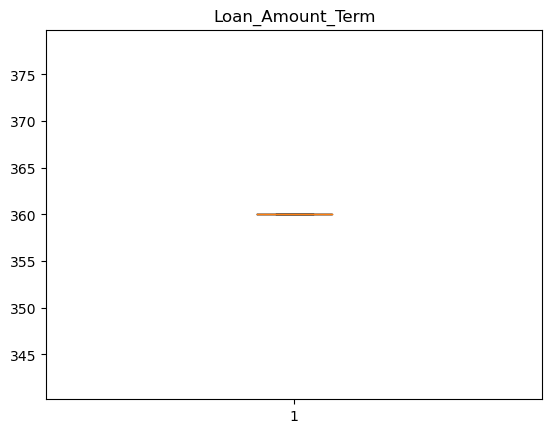

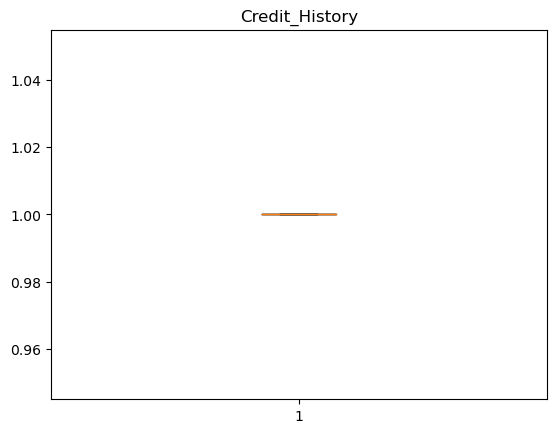

In [32]:
num_data=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'] 
for i in num_data:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)
    plt.show()

#### Now there is no outliers in the dataset.

### Outlier Handling of test data

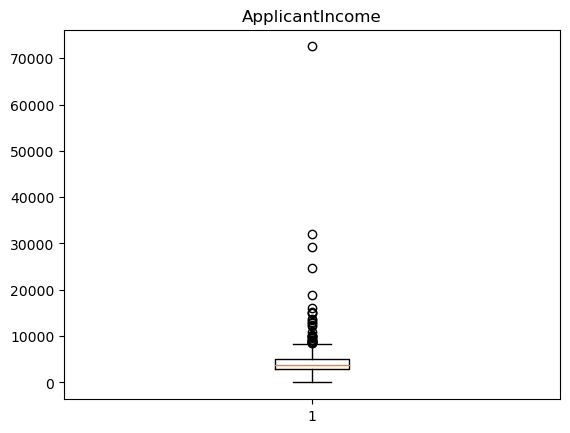

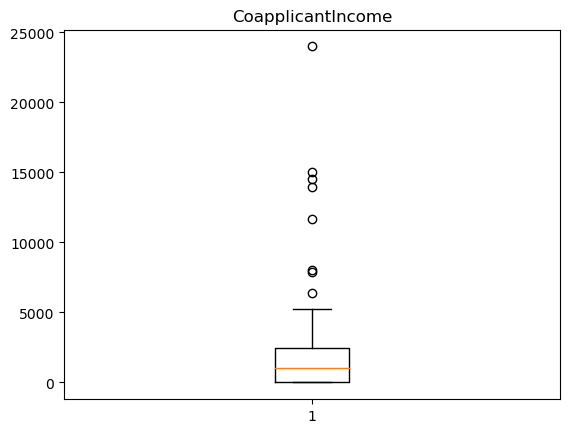

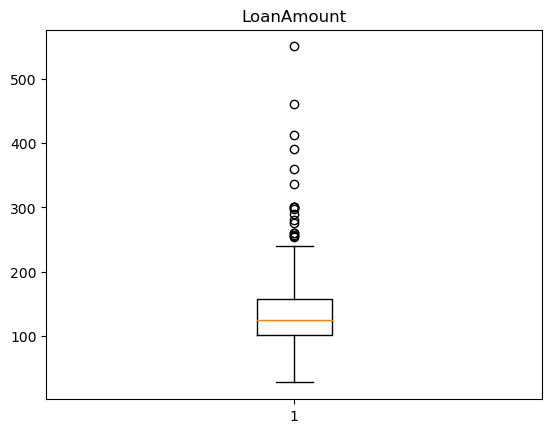

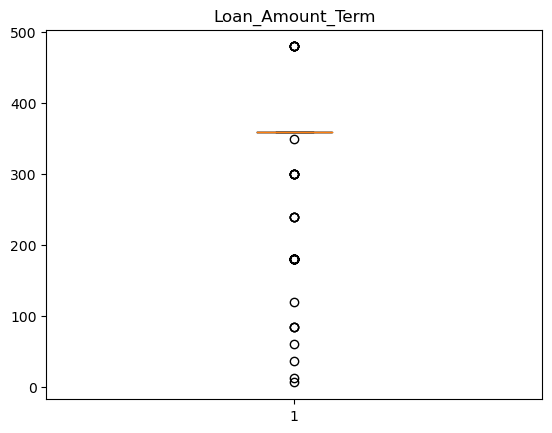

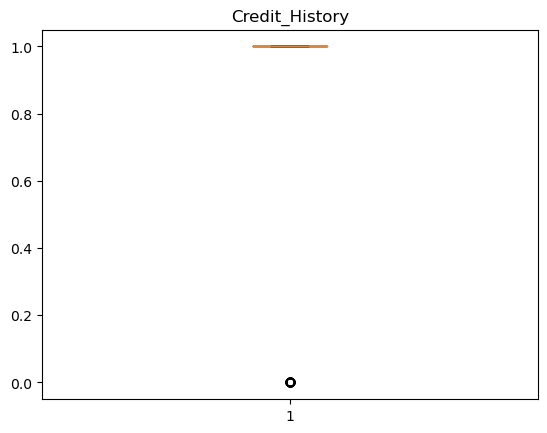

In [33]:
num_data=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'] 
for i in num_data:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)
    plt.show()

#### *From the above boxplots, we can see that there is outliers in all the numerical features. Since, it may harm the dataset if we remove the outlier, we can perform flooring and capping technique to handle the outliers.

### Outlier handling of feature 'ApplicantIncome' of test data

In [34]:
Q1_Ait=np.percentile(test['ApplicantIncome'],25,interpolation='midpoint')
Q2_Ait=np.percentile(test['ApplicantIncome'],50,interpolation='midpoint')
Q3_Ait=np.percentile(test['ApplicantIncome'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_Ait=Q3_Ait-Q1_Ait
up_lim_Ait=Q3_Ait+1.5*IQR_Ait
low_lim_Ait=Q1_Ait-1.5*IQR_Ait
test['ApplicantIncome']=np.where(test['ApplicantIncome']>up_lim_Ait,up_lim_Ait,np.where(test['ApplicantIncome']<low_lim_Ait,low_lim_Ait,test['ApplicantIncome']))

#### Outlier Handling for 'CoapplicantIncome' of test data

In [35]:
Q1_cait=np.percentile(test['CoapplicantIncome'],25,interpolation='midpoint')
Q2_cait=np.percentile(test['CoapplicantIncome'],50,interpolation='midpoint')
Q3_cait=np.percentile(test['CoapplicantIncome'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_cait=Q3_cait-Q1_cait
up_lim_cait=Q3_cait+1.5*IQR_cait
low_lim_cait=Q1_cait-1.5*IQR_cait
test['CoapplicantIncome']=np.where(test['CoapplicantIncome']>up_lim_cait,up_lim_cait,np.where(test['CoapplicantIncome']<low_lim_cait,low_lim_cait,test['CoapplicantIncome']))

#### Outlier Handling for 'LoanAmount' of test data

In [36]:
Q1_tla=np.percentile(test['LoanAmount'],25,interpolation='midpoint')
Q2_tla=np.percentile(test['LoanAmount'],50,interpolation='midpoint')
Q3_tla=np.percentile(test['LoanAmount'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_tla=Q3_tla-Q1_tla
up_lim_tla=Q3_tla+1.5*IQR_tla
low_lim_tla=Q1_tla-1.5*IQR_tla
test['LoanAmount']=np.where(test['LoanAmount']>up_lim_tla,up_lim_tla,np.where(test['LoanAmount']<low_lim_tla,low_lim_tla,test['LoanAmount']))

#### Outlier handling for 'Loan_Amount_Term' of test data

In [37]:
Q1_tlat=np.percentile(test['Loan_Amount_Term'],25,interpolation='midpoint')
Q2_tlat=np.percentile(test['Loan_Amount_Term'],50,interpolation='midpoint')
Q3_tlat=np.percentile(test['Loan_Amount_Term'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_tlat=Q3_tlat-Q1_tlat
up_lim_tlat=Q3_tlat+1.5*IQR_tlat
low_lim_tlat=Q1_tlat-1.5*IQR_tlat
test['Loan_Amount_Term']=np.where(test['Loan_Amount_Term']>up_lim_tlat,up_lim_tlat,np.where(test['Loan_Amount_Term']<low_lim_tlat,low_lim_tlat,test['Loan_Amount_Term']))

#### Outlier handling for 'Credit_History' of test data

In [38]:
Q1_cht=np.percentile(test['Credit_History'],25,interpolation='midpoint')
Q2_cht=np.percentile(test['Credit_History'],50,interpolation='midpoint')
Q3_cht=np.percentile(test['Credit_History'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_cht=Q3_cht-Q1_cht
up_lim_cht=Q3_cht+1.5*IQR_cht
low_lim_cht=Q1_cht-1.5*IQR_cht
test['Credit_History']=np.where(test['Credit_History']>up_lim_cht,up_lim_cht,np.where(test['Credit_History']<low_lim_cht,low_lim_cht,test['Credit_History']))

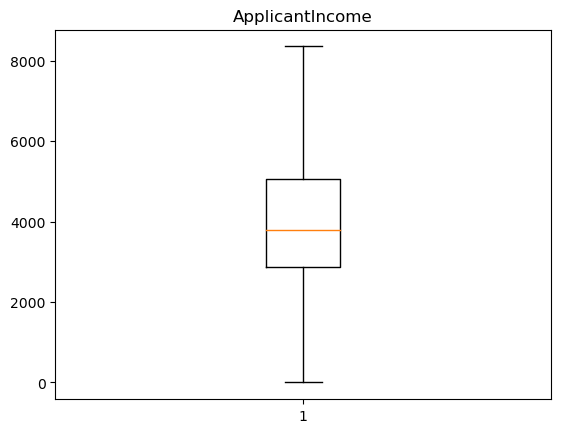

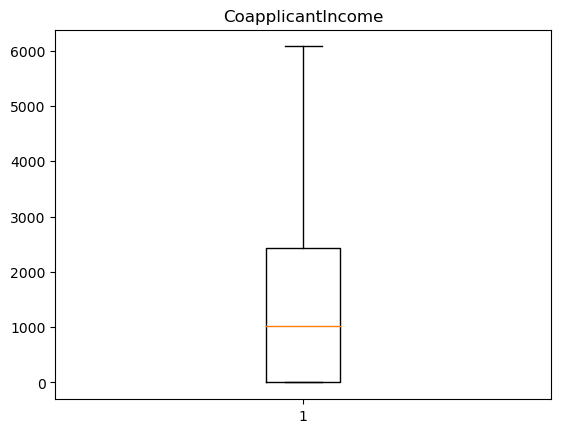

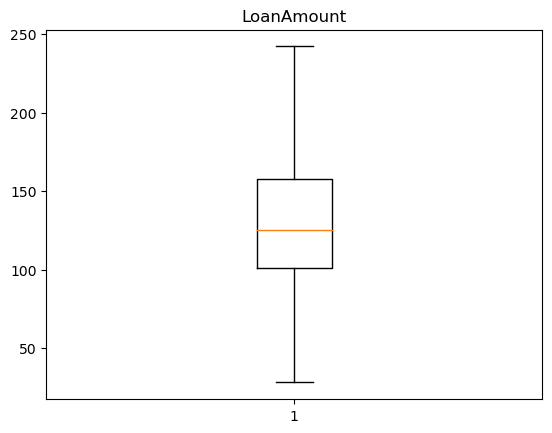

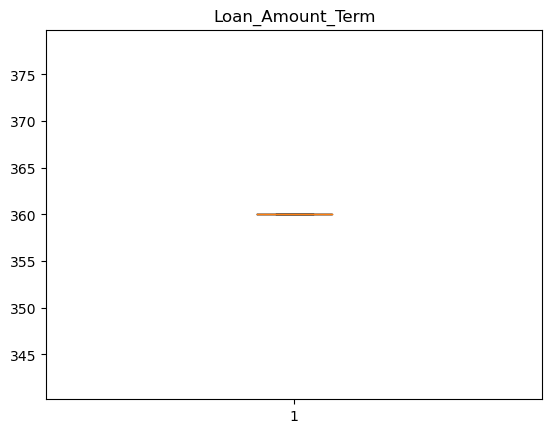

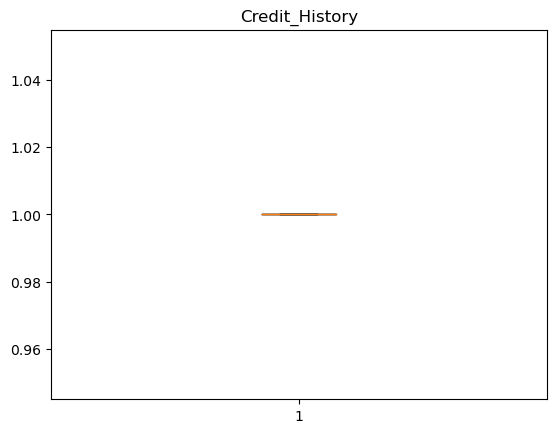

In [39]:
num_data=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'] 
for i in num_data:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)
    plt.show()

### Dropping 'Loan_ID' column from train data

The column 'Loan_ID' has only unique values. Since this column doesnot contribute anything to the model, we can drop this column.

In [40]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

In [41]:
train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


### Encoding categorical variables in train data and test data

In [43]:
X=train.drop('Loan_Status',axis=1)
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [44]:
y=train['Loan_Status'] #splitting the target variable

In [45]:
#Splitting the data into training and testing tests
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Implementing Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression() #creating an instance of Logistic Regression class 
logit_model.fit(X_train,y_train) # fitting a Logistic Regression model to the training data
 # predicting the target variable values

LogisticRegression()

In [47]:
pred_lr=logit_model.predict(X_test)

In [48]:
 from sklearn.metrics import accuracy_score

In [49]:
print('Accuracy =',accuracy_score(y_test,pred_lr))

Accuracy = 0.6493506493506493


In [50]:
pred_test=logit_model.predict(test)

In [51]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

### SVM Model

In [52]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
pred_svm=svmclf.predict(X_test)

In [54]:
print('Accuracy =',accuracy_score(y_test,pred_svm))

Accuracy = 0.6493506493506493


In [55]:
pred_test_svm=svmclf.predict(test)

In [56]:
pred_test_svm

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

### Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtm_clf=DecisionTreeClassifier()
dtm_clf.fit(X_train,y_train)
pred_dt=dtm_clf.predict(X_test)

In [58]:
print('Accuracy =',accuracy_score(y_test,pred_dt))

Accuracy = 0.5324675324675324


### Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
rd_pred=rf_clf.predict(X_test)

In [61]:
print('Accuracy =',accuracy_score(y_test,rd_pred))

Accuracy = 0.6363636363636364


###  From the above models, the best accuracy score got for Logistic Regression model. 

### Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid={ 'C': [0.1,1,10],
            'penalty':['l1','l2'],
             'solver': ['liblinear','saga'],
           }

In [64]:
lr_grid=GridSearchCV(logit_model,param_grid,cv=5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [65]:
best_params=lr_grid.best_params_
best_score=lr_grid.best_score_

In [66]:
print("Best Parameters :",best_params)
print("Best Scores :",best_score)

Best Parameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Scores : 0.7021739130434783


In [67]:
logit_model=LogisticRegression(C=best_params['C'],penalty=best_params['penalty'],solver=best_params['solver'])

In [68]:
logit_model.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [69]:
pred_lr=logit_model.predict(X_test)

In [70]:
print('Accuracy =',accuracy_score(y_test,pred_lr))

Accuracy = 0.6558441558441559


In [71]:
pred_test=logit_model.predict(test)

In [72]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

#### After Hyper parameter tuning using GRidSearchCV, the logistic regression model got a better accuracy score when compared with the model before fine tuning.

###  Making Submission File

In [99]:
submission_file=pd.read_csv(r"C:\Users\Amby\Downloads\sample_submission_49d68Cx.csv")

In [100]:
submission_file.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [101]:
submission_file=submission_file.drop('Loan_Status',axis=1)

### Adding predicted loan status column to the submission_file

In [102]:
submission_file['Loan_Status']=pred_test

In [103]:
submission_file.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


### Saving the submission_file dataframe to a csv file

In [104]:
submission_file.to_csv(r"C:\Users\Amby\Downloads\logisticmodel_finalsubmission2.csv",index=False)

In [105]:
finalsub=pd.read_csv(r"C:\Users\Amby\Downloads\logisticmodel_finalsubmission2.csv")

In [106]:
finalsub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [107]:
finalsub.isna().sum()

Loan_ID        0
Loan_Status    0
dtype: int64